In [119]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense,Dropout,Flatten
from keras.layers import Activation,MaxPool2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.utils.np_utils import to_categorical
import cv2
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
train_dir='images/train'
test_dir='images/test'
eval_dir='images/eval'

In [121]:
#classes: Optional list of class subdirectories (e.g. ['dogs', 'cats'])
train_batch_gen=ImageDataGenerator(rescale=1./255.).flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=10,
    classes=['cat','dog'])

test_batch_gen=ImageDataGenerator(rescale=1./255.).flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=20,
    classes=['cat','dog'])  


eval_batch_gen=ImageDataGenerator(rescale=1./255.).flow_from_directory(
    eval_dir,
    target_size=(224,224),
    batch_size=20,
    classes=['cat','dog']) #can also do class_mode='binary' # seems by putting cat first is consider that [1,0] and dog is [0,1]


Found 70 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [103]:
def visualize(img,ax):
    #img=cv2.imread(path)
    ax.imshow(img)

In [104]:
imgs,labels=next(train_batch_gen)
print(len(labels))

10


In [105]:
labels[0]

array([0., 1.], dtype=float32)

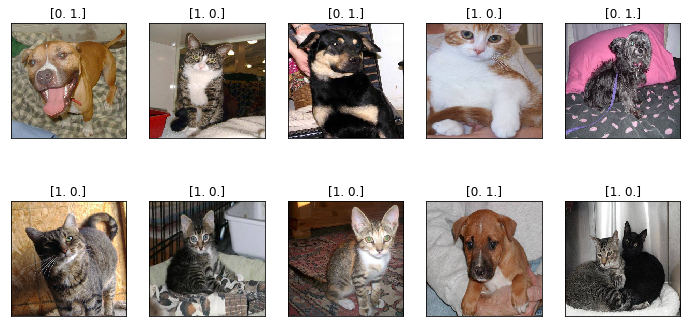

In [106]:
plt.figure(figsize=(12,6))
for i in range(len(labels)):
    ax=plt.subplot(2,len(labels)//2,i+1,xticks=[],yticks=[])
    visualize(imgs[i],ax)
    ax.set_title(labels[i])

# Building CNN

In [15]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)), #stride default (1,1), padding default='valid'
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100,activation='relu'), #(224-3)/1 +1= > 222*222*32 => 222*222*32
    Dropout(0.5),
    Dense(2,activation='softmax')   
])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               9331300   
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
__________

In [17]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
#70 sample size, 10 batch size, 7 times to go through a train data in one epoch
history=model.fit_generator(train_batch_gen,epochs=10,steps_per_epoch=70//10,
                    validation_data=eval_batch_gen,validation_steps=20//20,verbose=2)

Epoch 1/10
 - 4s - loss: 0.8959 - acc: 0.5145 - val_loss: 0.7124 - val_acc: 0.5000
Epoch 2/10
 - 4s - loss: 0.7465 - acc: 0.5571 - val_loss: 0.6964 - val_acc: 0.6111
Epoch 3/10
 - 3s - loss: 0.6143 - acc: 0.6981 - val_loss: 0.7356 - val_acc: 0.5000
Epoch 4/10
 - 3s - loss: 0.6389 - acc: 0.6226 - val_loss: 0.7633 - val_acc: 0.5000
Epoch 5/10
 - 4s - loss: 0.6991 - acc: 0.7000 - val_loss: 0.6875 - val_acc: 0.4444
Epoch 6/10
 - 4s - loss: 0.5336 - acc: 0.7387 - val_loss: 0.6776 - val_acc: 0.6111
Epoch 7/10
 - 4s - loss: 0.5033 - acc: 0.7613 - val_loss: 0.6699 - val_acc: 0.5556
Epoch 8/10
 - 4s - loss: 0.4726 - acc: 0.7823 - val_loss: 0.6660 - val_acc: 0.5000
Epoch 9/10
 - 4s - loss: 0.4066 - acc: 0.8403 - val_loss: 0.6718 - val_acc: 0.5000
Epoch 10/10
 - 6s - loss: 0.4142 - acc: 0.8714 - val_loss: 0.6705 - val_acc: 0.4444


In [19]:
history_dic=history.history

In [20]:
history_dic

{'val_loss': [0.7123938202857971,
  0.6963891386985779,
  0.7355589270591736,
  0.7632948756217957,
  0.6875107884407043,
  0.6776489019393921,
  0.6699005365371704,
  0.6660096049308777,
  0.671845018863678,
  0.6704984307289124],
 'val_acc': [0.5,
  0.6111111044883728,
  0.5,
  0.5,
  0.4444444477558136,
  0.6111111044883728,
  0.5555555820465088,
  0.5,
  0.5,
  0.4444444477558136],
 'loss': [0.9157544374465942,
  0.7464830790247236,
  0.5966665639921471,
  0.6779554640093157,
  0.69907089642116,
  0.5503404842269036,
  0.475444560089419,
  0.4987605353516917,
  0.4162896756202944,
  0.4142481301512037],
 'acc': [0.5161290457171779,
  0.5571428622518267,
  0.6851851918079235,
  0.5806451766721664,
  0.7000000136239188,
  0.7096774270457606,
  0.7903225825678918,
  0.7580645257426847,
  0.822580631702177,
  0.8714285748345512]}

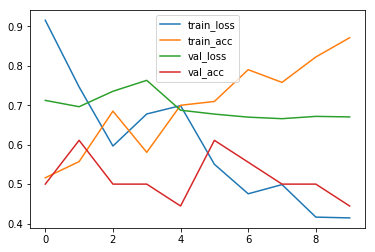

In [21]:
import matplotlib.pyplot as plt
list_epoch=np.arange(0,10)
plt.plot(list_epoch,history_dic['loss'])
plt.plot(list_epoch,history_dic['acc'])
plt.plot(list_epoch,history_dic['val_loss'])
plt.plot(list_epoch,history_dic['val_acc'])
plt.legend(['train_loss','train_acc','val_loss','val_acc'])

In [22]:
test_imgs,test_labels=next(test_batch_gen)

In [23]:
test_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [24]:
prediction=model.predict_generator(test_batch_gen,steps=1,verbose=0)  #take two steps to go though all test

In [25]:
prediction

array([[0.57543284, 0.42456716],
       [0.33129668, 0.6687033 ],
       [0.48015544, 0.5198445 ],
       [0.40550104, 0.59449893],
       [0.57943994, 0.4205601 ],
       [0.7641975 , 0.23580241],
       [0.41121897, 0.588781  ],
       [0.60434216, 0.3956578 ],
       [0.6074341 , 0.39256588],
       [0.7633435 , 0.23665644],
       [0.395062  , 0.604938  ],
       [0.282761  , 0.717239  ],
       [0.28056884, 0.7194312 ],
       [0.4986233 , 0.5013766 ],
       [0.3355613 , 0.6644387 ],
       [0.58307064, 0.41692933],
       [0.5400267 , 0.45997328],
       [0.63918585, 0.36081415],
       [0.72320074, 0.27679926],
       [0.08560681, 0.9143931 ]], dtype=float32)

In [26]:
test_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [27]:
prediction_round=np.argmax(prediction,axis=1)
test_round=np.argmax(test_labels,axis=1)


In [28]:
np.mean(prediction_round==test_round)

0.7

In [29]:
cm=confusion_matrix(prediction_round,test_round)

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[7 3]
 [3 7]]


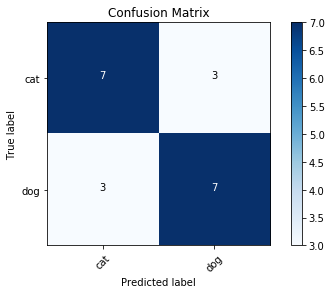

In [31]:
#if argmax=0 'cat' [1,0], if argmax=1 'dog' [0,1]
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

# Build and fine-tune VGG16


In [107]:
#another way from keras.applications import VGG16
#conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3)) #input shape optional, drop FC
model_vgg16=keras.applications.vgg16.VGG16()

In [108]:
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [109]:
len(model_vgg16.trainable_weights)  #16*2 16*(wweigh+bias), count conv and fc no pooling

32

In [110]:
type(model_vgg16)  #from keras functional API

keras.engine.training.Model

In [111]:
model=Sequential()

for layer in model_vgg16.layers[:-1]:  #this will drop the last layer prediction (Dense)
    
    model.add(layer)
    

In [112]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [113]:
print(len(model.trainable_weights))
for layer in model.layers:   #len(model.trainable_weights)
    
    layer.trainable=False   #if you put model.trainable=False (by mistake) if will do all lasyer, better doin layer by layer
print(len(model.trainable_weights))    #all turned off here,
#then need to add a FC (since is dog/cat) is small/similar sample only remove last FC and add new one



30
0


In [114]:
model.add(Dense(2,activation='softmax')) #does trainable need to be on manually ?
#print(len(model.trainable_weights))


In [115]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [116]:
len(model.trainable_weights)

2

In [117]:
print(model.layers[-1])

In [118]:
for layer in model.layers:
    print(layer.name,layer.trainable)

input_4 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
flatten False
fc1 False
fc2 False
dense_7 True


# train VGG16 fine-tune

In [122]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [123]:
# checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
#                                save_best_only=True)
history=model.fit_generator(train_batch_gen,steps_per_epoch=70//10,epochs=20,
                    validation_data=eval_batch_gen,validation_steps=20//20,verbose=2)  #callbacks=[checkpointer]

Epoch 1/20
 - 31s - loss: 0.7680 - acc: 0.5286 - val_loss: 0.6814 - val_acc: 0.5000
Epoch 2/20
 - 31s - loss: 0.7639 - acc: 0.4714 - val_loss: 0.6613 - val_acc: 0.5000
Epoch 3/20
 - 31s - loss: 0.6865 - acc: 0.5000 - val_loss: 0.6658 - val_acc: 0.5000
Epoch 4/20
 - 31s - loss: 0.7054 - acc: 0.5571 - val_loss: 0.6427 - val_acc: 0.6000
Epoch 5/20
 - 31s - loss: 0.6632 - acc: 0.6143 - val_loss: 0.6350 - val_acc: 0.7000
Epoch 6/20
 - 30s - loss: 0.6506 - acc: 0.6286 - val_loss: 0.6313 - val_acc: 0.7500
Epoch 7/20
 - 30s - loss: 0.6380 - acc: 0.6857 - val_loss: 0.6371 - val_acc: 0.6000
Epoch 8/20
 - 31s - loss: 0.6297 - acc: 0.7429 - val_loss: 0.6282 - val_acc: 0.7000
Epoch 9/20
 - 31s - loss: 0.6152 - acc: 0.7571 - val_loss: 0.6267 - val_acc: 0.7000
Epoch 10/20
 - 30s - loss: 0.6132 - acc: 0.7286 - val_loss: 0.6261 - val_acc: 0.6000
Epoch 11/20
 - 34s - loss: 0.6005 - acc: 0.6857 - val_loss: 0.6228 - val_acc: 0.7500
Epoch 12/20
 - 37s - loss: 0.5878 - acc: 0.7286 - val_loss: 0.6221 - val_a

In [ ]:
#model.load_weights('model.weights.best.hdf5')

In [ ]:
prediction=model.predict_generator(test_batch_gen,steps=1,verbose=1)

In [125]:
test_imgs,test_labels=next(test_batch_gen)
prediction_round=np.argmax(prediction,axis=1)
test_round=np.argmax(test_labels,axis=1)
np.mean(prediction_round==test_round)

0.3

In [126]:
len(test_labels)

20

In [129]:
history_dic=history.history

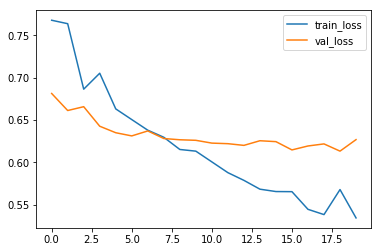

In [131]:
import matplotlib.pyplot as plt
list_epoch=np.arange(0,20)
plt.plot(list_epoch,history_dic['loss'])

plt.plot(list_epoch,history_dic['val_loss'])

plt.legend(['train_loss','val_loss'])

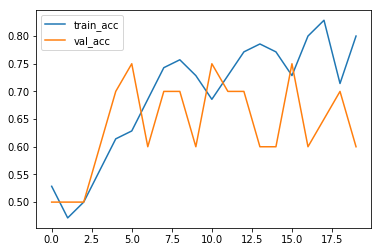

In [134]:
import matplotlib.pyplot as plt
list_epoch=np.arange(0,20)

plt.plot(list_epoch,history_dic['acc'])

plt.plot(list_epoch,history_dic['val_acc'])
plt.legend(['train_acc','val_acc'])